#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [22]:
#MSE
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

Epoch 1/12
293/293 [==============================] - 22s 74ms/step - loss: 0.0404 - accuracy: 0.7079 - val_loss: 0.0452 - val_accuracy: 0.6814
Epoch 2/12
293/293 [==============================] - 21s 73ms/step - loss: 0.0372 - accuracy: 0.7339 - val_loss: 0.0440 - val_accuracy: 0.6918
Epoch 3/12
293/293 [==============================] - 21s 73ms/step - loss: 0.0347 - accuracy: 0.7549 - val_loss: 0.0422 - val_accuracy: 0.7003
Epoch 4/12
293/293 [==============================] - 21s 73ms/step - loss: 0.0326 - accuracy: 0.7709 - val_loss: 0.0418 - val_accuracy: 0.7021
Epoch 5/12
293/293 [==============================] - 21s 73ms/step - loss: 0.0303 - accuracy: 0.7893 - val_loss: 0.0413 - val_accuracy: 0.7053
Epoch 6/12
293/293 [==============================] - 21s 72ms/step - loss: 0.0282 - accuracy: 0.8058 - val_loss: 0.0395 - val_accuracy: 0.7179
Epoch 7/12
293/293 [==============================] - 22s 75ms/step - loss: 0.0260 - accuracy: 0.8210 - val_loss: 0.0400 - val_accuracy:

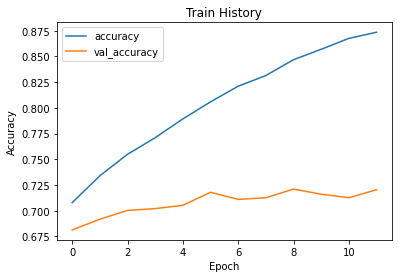

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')

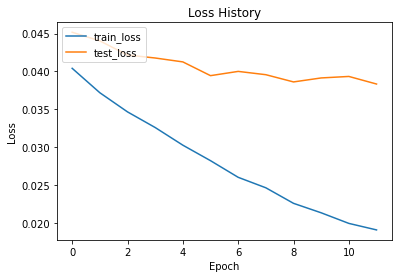

In [24]:
def show_loss_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Loss History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'test_loss'], loc='upper left')
    plt.show()
show_loss_history('loss','val_loss')

In [25]:
#binary _crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

Epoch 1/12
293/293 [==============================] - 24s 82ms/step - loss: 0.1031 - accuracy: 0.8694 - val_loss: 0.1447 - val_accuracy: 0.7271
Epoch 2/12
293/293 [==============================] - 24s 81ms/step - loss: 0.0806 - accuracy: 0.8934 - val_loss: 0.1422 - val_accuracy: 0.7298
Epoch 3/12
293/293 [==============================] - 24s 81ms/step - loss: 0.0717 - accuracy: 0.9047 - val_loss: 0.1386 - val_accuracy: 0.7371
Epoch 4/12
293/293 [==============================] - 24s 81ms/step - loss: 0.0660 - accuracy: 0.9110 - val_loss: 0.1393 - val_accuracy: 0.7306
Epoch 5/12
293/293 [==============================] - 23s 79ms/step - loss: 0.0604 - accuracy: 0.9216 - val_loss: 0.1395 - val_accuracy: 0.7294
Epoch 6/12
293/293 [==============================] - 23s 78ms/step - loss: 0.0544 - accuracy: 0.9308 - val_loss: 0.1388 - val_accuracy: 0.7336
Epoch 7/12
293/293 [==============================] - 23s 78ms/step - loss: 0.0518 - accuracy: 0.9338 - val_loss: 0.1398 - val_accuracy:

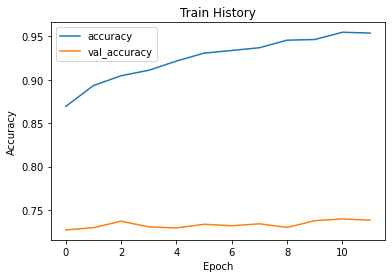

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')

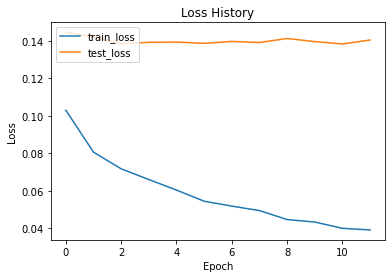

In [27]:
def show_loss_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Loss History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'test_loss'], loc='upper left')
    plt.show()
show_loss_history('loss','val_loss')

In [ ]:
#但可以看到test的loss一直降不下來，有可能有過擬合的問題